### ONLINE RETAIL CASE STUDY

## Data Set Information:

    This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Attribute Information:

    InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    Description: Product (item) name. Nominal.
    Quantity: The quantities of each product (item) per transaction. Numeric.
    InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
    UnitPrice: Unit price. Numeric, Product price per unit in sterling.
    CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    Country: Country name. Nominal, the name of the country where each customer resides.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import scipy

In [3]:
df=pd.read_csv("J:/UPGRAD/Machine Learning I/Clustering/Online+Retail.csv",encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape


(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
round(100*(df.isnull().sum()/len(df)),2) #identifying missing values

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
df=df.dropna() #dropping missing values

In [9]:
df.shape #new dataset

(406829, 8)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


## Data Preparation using RFM

In [11]:
df["amount"]=df.Quantity*df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
grp=df.groupby("CustomerID")['amount'].sum()  #creating new df for monetary value
grp=grp.reset_index()
grp.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
frq=df.groupby("CustomerID")['InvoiceNo'].count() #creating new df for frequency value
frq=frq.reset_index()
frq.columns=["CustomerID",'frequency']
frq.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
#merge monetary and frequency df
grp=pd.merge(grp,frq,how="inner",on="CustomerID")
grp.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [15]:
#changing date format from object to date time
df.InvoiceDate=pd.to_datetime(df.InvoiceDate,format="%d-%m-%y %H:%M")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [17]:
maxdt=max(df.InvoiceDate)
maxdt

Timestamp('2011-12-09 12:50:00')

In [18]:
#let's compute the diff
df['diff']=maxdt-df.InvoiceDate




In [19]:
#recency
lstpur=df.groupby('CustomerID')['diff'].min()
lstpur=lstpur.reset_index()
lstpur.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [20]:
#merge with grp dataset to have Monetary, Frequency and Recency value all at one
grp=pd.merge(grp,lstpur,how="inner", on='CustomerID')



In [21]:
grp.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [22]:
grp=grp.rename(columns={'diff':'recency'})

In [23]:
grp.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [24]:
import datetime as dt

In [25]:
grp.recency=grp.recency.dt.days #to get only days omitting the hours from the dataset


In [26]:
grp.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1cda8590fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cda85a1978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cda8590e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1cda85a1da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cda85b2390>],
 'means': []}

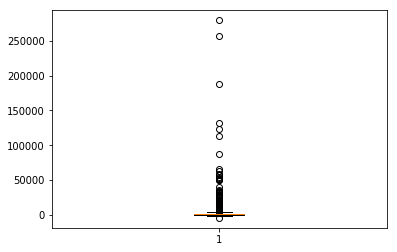

In [27]:
#outlier visualization
plt.boxplot(grp.amount)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cda861dac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cda861def0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cda861d6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cda8627828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cda8627b70>],
 'means': []}

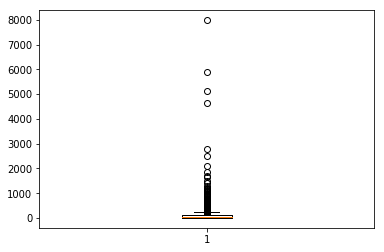

In [28]:
plt.boxplot(grp.frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cda8681e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1cda868d7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cda8681d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1cda868de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cda868df60>],
 'means': []}

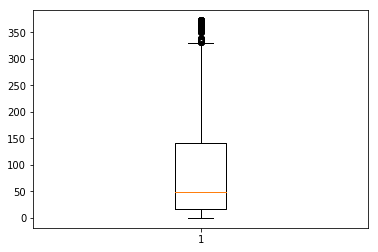

In [29]:
plt.boxplot(grp.recency)

In [30]:
#outlier treatment
#for amount
Q1=grp.amount.quantile(0.05)
Q3=grp.amount.quantile(0.95)
IQR=Q3-Q1
grp=grp[(grp.amount >= Q1 - 1.5*IQR) & (grp.amount <= Q3 + 1.5*IQR)]

#for recency
Q1=grp.recency.quantile(0.05)
Q3=grp.recency.quantile(0.95)
IQR=Q3-Q1
grp=grp[(grp.recency >= Q1 - 1.5*IQR) & (grp.recency <= Q3 + 1.5*IQR)]

#for frequency
Q1=grp.frequency.quantile(0.05)
Q3=grp.frequency.quantile(0.95)
IQR=Q3-Q1
grp=grp[(grp.frequency >= Q1 - 1.5*IQR) & (grp.frequency <= Q3 + 1.5*IQR)]

In [31]:
rfm=grp[['amount','frequency','recency']]  #for scaling
rfm.head() 

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
rfm_scale=scaler.fit_transform(rfm)
rfm_scale

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [34]:
rfm_scale.shape

(4293, 3)

In [35]:
rfm_scale=pd.DataFrame(rfm_scale)
rfm_scale.columns=['amount','frequency','recency']
rfm_scale.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Modeling

In [36]:
from sklearn.cluster import KMeans

In [37]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [38]:
kmean=KMeans(n_clusters=4,max_iter=50)
kmean.fit(rfm_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
kmean.labels_

array([0, 1, 2, ..., 0, 2, 2])

## Finding optimal clusters

In [40]:
#plotting an elbow curve
range_clust=[2,3,4,5,6,7,8]
ssd=[] #Sum of squared distance
for n in range_clust:
    kmean=KMeans(n_clusters=n,max_iter=50)
    kmean.fit(rfm_scale)
    ssd.append(kmean.inertia_)
ssd
    

[7661.701161911671,
 4433.580619302122,
 3360.37537327132,
 2802.8241284834658,
 2391.9620867548574,
 2038.9098807207965,
 1825.7833590403156]

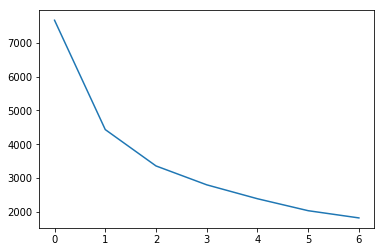

In [41]:
plt.plot(ssd)

In [42]:
#Silhouette Analysis
from sklearn.metrics import silhouette_score
range_clust=[2,3,4,5,6,7,8]
for n in range_clust:
    kmean=KMeans(n_clusters=n,max_iter=50)
    kmean.fit(rfm_scale)
    lbl=kmean.labels_
    sil_scr=silhouette_score(rfm_scale,lbl)
    print("For n_clusters={0}, the silhouette score is {1}".format(n, sil_scr))


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.477782010021685
For n_clusters=5, the silhouette score is 0.46437291959505433
For n_clusters=6, the silhouette score is 0.4171229822428261
For n_clusters=7, the silhouette score is 0.41768907282021733
For n_clusters=8, the silhouette score is 0.40791409868942663


In [43]:
#seems 3 to be the optimal cluster as per elbow curve and Silhouette Analysis

In [44]:
kmean=KMeans(n_clusters=3,max_iter=50)
kmean.fit(rfm_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#assigning the labels to CustID
grp['Clus_ID']=kmean.labels_
grp.head()

,CustomerID,amount,frequency,recency,Clus_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


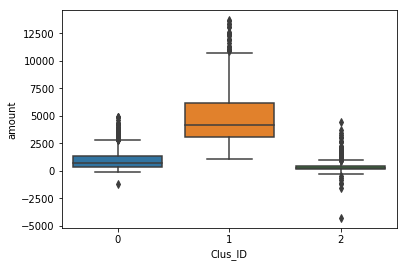

In [46]:
sns.boxplot(x='Clus_ID',y='amount',data=grp)

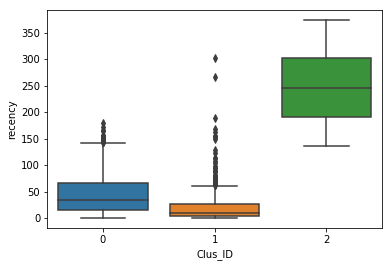

In [47]:
sns.boxplot(x='Clus_ID',y='recency',data=grp)

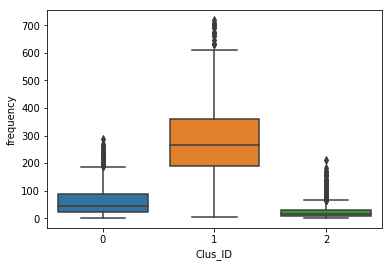

In [48]:
sns.boxplot(x='Clus_ID',y='frequency',data=grp)

## Hierarchical Clustering Analysis


In [49]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [50]:
rfm_scale.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [60]:
link_df=grp
link_df.head()

,CustomerID,amount,frequency,recency,Clus_ID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


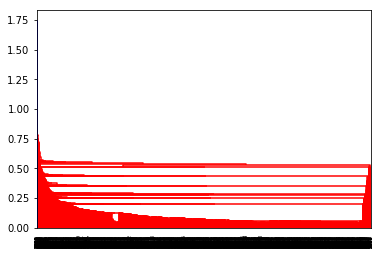

In [52]:
#single linkage
merge=linkage(rfm_scale,method='single',metric='euclidean')
dendrogram(merge)
plt.show()

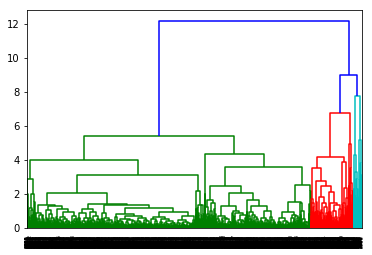

In [53]:
#complete linkage
merge=linkage(rfm_scale,method='complete',metric='euclidean')
dendrogram(merge)
plt.show()

In [58]:
clust=cut_tree(merge,n_clusters=3)
clust

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [57]:
clust.shape

(4293, 1)

In [62]:
clust=clust.reshape(-1,)
clust

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
link_df['Clust_label']=clust
link_df.head()

,CustomerID,amount,frequency,recency,Clus_ID,Clust_label
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


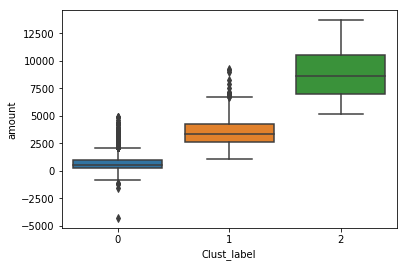

In [64]:
sns.boxplot(x='Clust_label',y='amount',data=link_df)

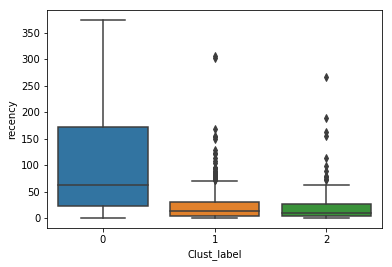

In [65]:
sns.boxplot(x='Clust_label',y='recency',data=link_df)

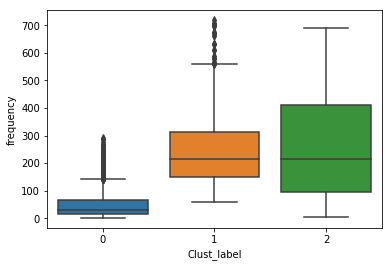

In [66]:
sns.boxplot(x='Clust_label',y='frequency',data=link_df)